In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

data_dir = '/content/drive/MyDrive/SIH'  

image_paths = []
labels = []

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        label = 0 if folder_name == 'healthy' else 1
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image_paths.append(image_path)
            labels.append(label)

combined = list(zip(image_paths, labels))
np.random.shuffle(combined)
image_paths, labels = zip(*combined)

train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)
def load_and_preprocess_images(image_paths, labels, target_size=(224, 224)):
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img = img.resize(target_size)  
        img_array = np.array(img)/255.0
        images.append(img_array)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

X_train, y_train = load_and_preprocess_images(train_paths, train_labels)
X_test, y_test = load_and_preprocess_images(test_paths, test_labels)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

(640, 224, 224, 3)
(640,)
(160, 224, 224, 3)
(160,)
Epoch 1/50
20/20 [==============================] - 83s 4s/step - loss: 0.8125 - accuracy: 0.5797
Epoch 2/50
20/20 [==============================] - 80s 4s/step - loss: 0.4627 - accuracy: 0.7922
Epoch 3/50
20/20 [==============================] - 78s 4s/step - loss: 0.3035 - accuracy: 0.8781
Epoch 4/50
20/20 [==============================] - 79s 4s/step - loss: 0.3096 - accuracy: 0.8938
Epoch 5/50
20/20 [==============================] - 81s 4s/step - loss: 0.2355 - accuracy: 0.9250
Epoch 6/50
20/20 [==============================] - 76s 4s/step - loss: 0.1908 - accuracy: 0.9281
Epoch 7/50
20/20 [==============================] - 75s 4s/step - loss: 0.1297 - accuracy: 0.9453
Epoch 8/50
20/20 [==============================] - 77s 4s/step - loss: 0.1816 - accuracy: 0.9391
Epoch 9/50
20/20 [==============================] - 75s 4s/step - loss: 0.1647 - accuracy: 0.9469
Epoch 10/50
20/20 [==============================] - 76s 4s/step -

In [10]:
model.save_weights('/content/drive/MyDrive/SIH/weights.h5')

5/5 [==============================] - 11s 2s/step
Accuracy: 91.25%


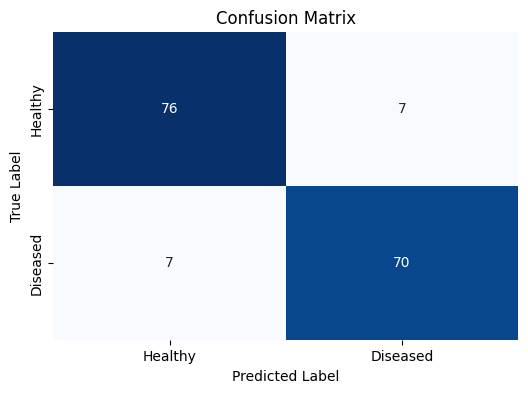

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32") 

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()